# Runnables in LangChain

## What are Runnables?

**Runnables** are a central abstraction in LangChain that represent any component or chain that can be “run” (executed) to process input and produce output. This includes language models, chains, tools, prompts, and even custom logic. The Runnable interface provides a unified way to handle execution, composition, streaming, and asynchronous runs across all types of LangChain components.

### Key Features

- **Unified Interface:** All major LangChain components (LLMs, chains, retrievers, tools, agents, etc.) implement the Runnable interface.
- **Composability:** Runnables can be chained, branched, or combined using operators like `|` (pipe), `&` (parallel), and more.
- **Flexible Execution:** Supports synchronous, asynchronous, and streaming runs.
- **Type Safety:** Interfaces are typed, leading to better reliability in pipelines.

### Why Use Runnables?

- **Consistency:** One interface for running, composing, and managing all pipeline components.
- **Modularity:** Easily mix, match, and reuse components in complex workflows.
- **Rich Composition:** Enables advanced patterns like branching, parallelism, and conditional execution with simple syntax.

### Example Usage

```python
from langchain_core.runnables import RunnableLambda
from langchain.llms import OpenAI

# Simple runnable from a lambda (custom function)
def to_upper(text):
    return text.upper()
upper_runnable = RunnableLambda(to_upper)

print(upper_runnable.invoke("hello"))  # Output: "HELLO"

# Composing runnables using | (pipe)
llm = OpenAI()
prompt = lambda name: f"Tell me a joke about {name}."
chain = RunnableLambda(prompt) | llm
result = chain.invoke("cats")
print(result)
```

### Composition Operators

- `|` : Pipe output of one runnable to the next (sequential composition)
- `&` : Run multiple runnables in parallel (parallel composition)
- **Branching, conditional, and mapping**: Advanced controls for dynamic workflows

### Learn More

- [LangChain Docs: Runnables](https://python.langchain.com/docs/expression_language/)
- [LangChain Cookbook: Composition](https://python.langchain.com/docs/cookbook/composition)

**Summary:**  
Runnables are the building blocks of LangChain workflows, providing a unified, modular, and composable interface for everything you can “run”—from LLMs and prompts to chains, tools, and custom logic.

| Chain Name               | Description                                                                     |
|--------------------------|---------------------------------------------------------------------------------|
| LLMChain                | Basic chain that calls an LLM with a prompt template.                         |
| SequentialChain         | Chains multiple LLM calls in a specific sequence.                              |
| SimpleSequentialChain   | A simplified version of SequentialChain for easier use.                        |
| ConversationalRetrievalChain | Handles conversational Q&A with memory and retrieval.                      |
| RetrievalQA             | Retrieves relevant documents and uses an LLM for question-answering.         |
| RouterChain             | Directs user queries to different chains based on intent.                     |
| MultiPromptChain        | Uses different prompts for different user intents dynamically.                |
| HydeChain (Hypothetical Document Embeddings) | Generates hypothetical answers to improve document retrieval.  |
| AgentExecutorChain      | Orchestrates different tools and actions dynamically using an agent.        |
| SQLDatabaseChain        | Connects to SQL databases and answers natural language queries.              |

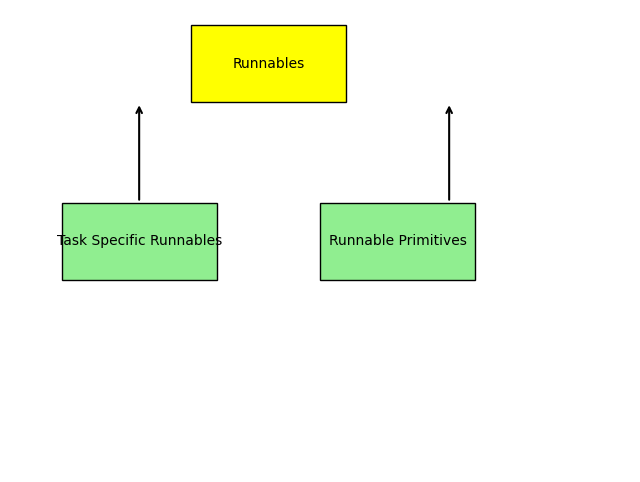

In [3]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')

# Function to draw a rectangle with centered text
def draw_box(x, y, text, color):
    width = 3
    height = 1
    rect = plt.Rectangle((x, y), width, height, fc=color, ec='black', zorder=2)
    ax.add_patch(rect)
    ax.text(x + width/2, y + height/2, text, ha='center', va='center', fontsize=10, zorder=3)

# Draw the top node
draw_box(3.5, 4.8, 'Runnables', 'yellow')

# Draw the child nodes
draw_box(1, 2.5, 'Task Specific Runnables', 'lightgreen')
draw_box(6, 2.5, 'Runnable Primitives', 'lightgreen')

# Draw arrows from top to children
ax.annotate('', xy=(2.5, 4.8), xytext=(2.5, 2.5 + 1), arrowprops=dict(arrowstyle='->', linewidth=1.5))
ax.annotate('', xy=(8.5, 4.8), xytext=(8.5, 2.5 + 1), arrowprops=dict(arrowstyle='->', linewidth=1.5))

# Set limits
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)

plt.show()

#### **Task Specific Runnables**
- **Definition:** These are *core* LangChain components that have been converted into Runnables so they can be used in pipelines.

- **Purpose:** Perform task-specific operations like LLM calls, prompting, retrieval, etc.

- **Examples:**
  - **ChatOpenAI** — Runs an LLM model.
  - **PromptTemplate** — Formats prompts dynamically.
  - **Retriever** — Retrieves relevant documents.

#### **Runnable Primitives**
- **Definition:** These are *fundamental* building blocks for structuring execution logic in AI workflows.

- **Purpose:** They help orchestrate execution by defining how different Runnables interact (sequentially, in parallel, conditionally, etc.).

- **Examples:**
  - **RunnableSequence** — Runs steps in order (`[operator]`).
  - **RunnableParallel** — Runs multiple steps simultaneously.
  - **RunnableMap** — Maps the same input across multiple functions.
  - **RunnableBranch** — Implements conditional execution (`if-else` logic).
  - **RunnableLambda** — Wraps custom Python functions into Runnables.
  - **RunnablePassThrough** — Just forwards input as output (acts as a placeholder).

## 1. RunnableSequence


**RunnableSequence** is a sequential chain of runnables in LangChain that executes each step one after another, passing the output of one step as the input to the next.

It is useful when you need to compose multiple runnables together in a structured workflow.

### What is RunnableSequence?

**RunnableSequence** is a core class in LangChain’s [Expression Language](https://python.langchain.com/docs/expression_language/) that allows you to compose multiple Runnables (language models, chains, retrievers, tools, or custom logic) into a pipeline where each step’s output is passed as input to the next step—much like a sequential chain, but with a more flexible and composable interface.


### Key Features

- **Sequential Composition:** Connects multiple Runnables into a single pipeline.
- **Type Safety:** Maintains input/output types between steps.
- **Modular & Reusable:** Each step can be a prompt, LLM, parser, retriever, or another chain.
- **Advanced Control:** Supports synchronous, asynchronous, and streaming executions.


### Why Use RunnableSequence?

- To build complex, multi-step pipelines with clear, readable code.
- To mix and match different types of components (prompts, models, output parsers, etc.).
- For more maintainable and scalable workflows than hand-rolled sequential logic.


### Basic Example

```python
from langchain.prompts import ChatPromptTemplate
from langchain.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnableSequence

# Define the steps
prompt = ChatPromptTemplate.from_template("Tell me a joke about {topic}")
llm = ChatOpenAI()
parser = StrOutputParser()

# Compose them into a RunnableSequence
chain = RunnableSequence([prompt, llm, parser])

# Run the chain
result = chain.invoke({"topic": "cats"})
print(result)
```

Or, using pipe (`|`) syntax:

```python
chain = prompt | llm | parser
result = chain.invoke({"topic": "cats"})
```

### When to Use RunnableSequence

- When you want to combine multiple processing steps into one reusable component.
- When you need to enforce a strict flow of data between steps.
- For readable, maintainable, and scalable multi-step pipelines.
  
**Summary:**  
`RunnableSequence` lets you build flexible, sequential workflows by connecting any number of Runnables—making complex LLM-powered pipelines easy to construct and maintain.

## 2. RunnableParallel


**RunnableParallel** is a runnable primitive that allows multiple runnables to execute in parallel.

Each runnable receives the same input and processes it independently, producing a dictionary of outputs.

### What is RunnableParallel?

**RunnableParallel** is a class in LangChain’s Expression Language that allows you to run multiple Runnables (language models, chains, tools, or custom logic) in parallel on the same input. Each Runnable processes the input independently, and their results are collected into a single output—usually a dictionary mapping each Runnable’s name to its result.

### Key Features

- **Parallel Execution:** Multiple Runnables are invoked at the same time, improving efficiency for independent tasks.
- **Same Input:** Each Runnable receives the same input.
- **Aggregated Output:** Results from all Runnables are returned as a single dictionary.
- **Flexible Composition:** Each sub-Runnable can be any chain, tool, model, or custom function.


### Why Use RunnableParallel?

- To process the same input in multiple, independent ways (e.g., summarization, sentiment analysis, keyword extraction).
- To improve performance by avoiding unnecessary sequential steps for unrelated tasks.
- For clean, modular, and scalable pipeline design.


### Basic Example

```python
from langchain.prompts import ChatPromptTemplate
from langchain.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnableParallel

# Define sub-runnables
prompt_summary = ChatPromptTemplate.from_template("Summarize: {text}")
prompt_keywords = ChatPromptTemplate.from_template("Extract keywords: {text}")

llm = ChatOpenAI()
parser = StrOutputParser()

summary_chain = prompt_summary | llm | parser
keywords_chain = prompt_keywords | llm | parser

# Compose them in RunnableParallel
parallel_chain = RunnableParallel({
    "summary": summary_chain,
    "keywords": keywords_chain,
})

result = parallel_chain.invoke({"text": "LangChain is a framework for building LLM-powered applications."})
print(result)
# Output:
# {'summary': 'LangChain is a framework...', 'keywords': 'LangChain, framework, LLM, applications'}
```

### When to Use RunnableParallel?

- When you want independent analysis or transformation of input data in parallel.
- When maximizing efficiency for multi-task processing.
- For any scenario where you need to aggregate multiple outputs from the same input.

**Summary:**  
`RunnableParallel` lets you run several processing steps in parallel on the same input and gather their outputs—ideal for efficient, multi-task, and modular LLM pipelines.

## 3. RunnablePassthrough


**RunnablePassthrough** is a special Runnable primitive that simply returns the input as output without modifying it.

### What is RunnablePassthrough?

**RunnablePassthrough** is a utility class in LangChain’s Expression Language that acts as an identity Runnable—it simply returns its input unchanged. It’s useful when building complex pipelines where you want to pass along input data without modification or when you need to merge original input with additional outputs from other Runnables.

### Key Features

- **Identity Functionality:** Returns the input as output, unchanged.
- **Pipeline Utility:** Useful for merging, branching, or multi-step workflows where unaltered input is needed downstream.
- **Composable:** Can be combined with other Runnables for advanced data routing and manipulation.

### Why Use RunnablePassthrough?

- To preserve and forward the original input alongside other processing results.
- When you want to combine the results of multiple Runnables (including the original input) in a pipeline or parallel structure.
- For building flexible, reusable, and modular data flows in complex chains.

### Example Usage

```python
from langchain_core.runnables import RunnablePassthrough, RunnableParallel

passthrough = RunnablePassthrough()

# Example: Combine original input and a processed output
def to_upper(text):
    return text.upper()

from langchain_core.runnables import RunnableLambda

upper_runnable = RunnableLambda(to_upper)

# Run both in parallel, preserving the original
parallel = RunnableParallel({
    "original": passthrough,
    "uppercased": upper_runnable,
})

result = parallel.invoke("langchain")
print(result)
# Output: {'original': 'langchain', 'uppercased': 'LANGCHAIN'}
```

### When to Use RunnablePassthrough?

- When you need to “split” or “fork” the input to keep it available for later steps.
- In parallel pipelines where you want to keep the original input along with one or more processed versions.
- For debugging, auditing, or enriching outputs with original input context.

**Summary:**  
`RunnablePassthrough` is a simple but powerful utility for keeping the original input available in complex LangChain pipelines, enabling flexible data routing and rich multi-step workflows.

## 4. RunnableLambda

**RunnableLambda** is a runnable primitive that allows you to apply custom Python functions within an AI pipeline.

It acts as a middleware between different AI components, enabling preprocessing, transformation, API calls, filtering, and post-processing in a LangChain workflow.

### What is RunnableLambda?

**RunnableLambda** is a utility class in LangChain’s Expression Language that allows you to wrap any Python function (lambda or regular) as a Runnable, making it compatible with LangChain’s pipeline architecture. This means you can use your custom logic—such as data transformations, filtering, or formatting—as a seamless step in your chains, right alongside LLMs, prompts, and other Runnables.

### Key Features

- **Custom Logic:** Wraps any function for use in LangChain pipelines.
- **Composable:** Can be combined with other Runnables using operators like `|` (pipe) and `&` (parallel).
- **Flexible Input/Output:** Accepts and returns any type compatible with your pipeline.
- **Supports Sync/Async:** Works with both synchronous and asynchronous functions.

### Why Use RunnableLambda?

- To integrate arbitrary Python logic into your LLM pipelines.
- To perform preprocessing, postprocessing, or custom computation.
- For transforming or enriching data between LLM and tool steps.

### Example Usage

```python
from langchain_core.runnables import RunnableLambda

# Define a function to uppercase text
def to_upper(text):
    return text.upper()

# Wrap it as a Runnable
upper_runnable = RunnableLambda(to_upper)

print(upper_runnable.invoke("langchain"))  # Output: "LANGCHAIN"

# Use with LLMs or other Runnables
from langchain.llms import OpenAI

def format_prompt(name):
    return f"Tell me a joke about {name}."

prompt_runnable = RunnableLambda(format_prompt)
llm = OpenAI()

chain = prompt_runnable | llm
result = chain.invoke("cats")
print(result)
```

### When to Use RunnableLambda?

- To insert custom data transformations or logic in your pipeline.
- When you need to preprocess data before sending it to an LLM or tool.
- For postprocessing LLM/tool outputs (e.g., cleaning, parsing, formatting).

**Summary:**  
`RunnableLambda` lets you wrap any Python function as a Runnable, making it a flexible, composable building block in your LangChain workflows.

## 5. RunnableBranch

**RunnableBranch** is a control flow component in LangChain that allows you to conditionally route input data to different chains or runnables based on custom logic.

It functions like an if/elif/else block for chains — where you define a set of condition functions, each associated with a runnable (e.g., LLM call, prompt chain, or tool). The first matching condition is executed. If no condition matches, a default runnable is used (if provided).

### What is RunnableBranch?

**RunnableBranch** is a class in LangChain’s Expression Language that enables dynamic branching in your pipelines. It allows you to direct input to different Runnables (such as LLM chains, tools, or custom functions) based on conditional logic—similar to an if/else or switch/case statement in traditional programming.

### Key Features

- **Conditional Routing:** Directs input to one of several branches (Runnables) based on a user-defined predicate or function.
- **Flexible Logic:** Branching logic can be as simple or as complex as needed, based on input data.
- **Composable:** Integrates with other Runnables for modular, readable pipelines.

### Why Use RunnableBranch?

- To build adaptive workflows that change behavior based on user input, metadata, or intermediate results.
- For command interpreters, multi-language bots, or context-aware responses.
- To implement decision trees or business logic flows within LLM pipelines.

### Example Usage

```python
from langchain_core.runnables import RunnableBranch, RunnableLambda

def is_spanish(inputs):
    return "es" in inputs.get("language", "")

def is_french(inputs):
    return "fr" in inputs.get("language", "")

def default_response(inputs):
    return f"Language '{inputs.get('language')}' not supported."

spanish_chain = RunnableLambda(lambda inputs: "¡Hola!")
french_chain = RunnableLambda(lambda inputs: "Bonjour!")
default_chain = RunnableLambda(default_response)

branch = RunnableBranch(
    branches=[
        (is_spanish, spanish_chain),
        (is_french, french_chain),
    ],
    default=default_chain,
)

result = branch.invoke({"language": "fr"})
print(result)  # Output: "Bonjour!"
```

- The input is checked against each condition (predicate). The first one that returns True determines which Runnable is executed.
- If none match, the `default` branch is used.

### When to Use RunnableBranch?

- When your pipeline must adapt to different types of inputs or scenarios.
- For routing commands, handling multiple languages, or customizing workflows based on user data.
- Whenever you need “if/else” or “switch/case” logic in your LLM pipeline.

**Summary:**  
`RunnableBranch` lets you add flexible, conditional logic to LangChain pipelines, making your workflows smarter and more adaptive.

## LCEL (LangChain Expression Language)

### What is LCEL?

**LCEL** stands for **LangChain Expression Language**. It is a flexible and composable abstraction in [LangChain](https://python.langchain.com/docs/expression_language/) that lets you build, compose, and orchestrate LLM workflows using simple, readable Python syntax. LCEL makes it easy to create complex pipelines by connecting different components (like prompts, LLMs, parsers, retrievers, tools, and custom logic) as "Runnables".

### Key Concepts

- **Runnables:** The core building blocks—anything that can process input and produce output, such as LLMs, chains, or functions.
- **Composition Operators:** Seamlessly combine Runnables using operators:
  - `|` (pipe) for sequential composition.
  - `&` (ampersand) for parallel execution.
- **Branching & Conditional Logic:** Use special Runnables to introduce if/else logic, parallelism, and more.

### Why Use LCEL?

- **Declarative Pipelines:** Build workflows as readable, modular graphs.
- **Reusability:** Easily reuse and share pipeline components.
- **Flexibility:** Mix and match prompts, models, tools, and logic.
- **Type Safety and Introspection:** Understand input/output types and structure for better debugging and reliability.

### Example: Building a Simple LCEL Pipeline

```python
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain.output_parsers import StrOutputParser

# Define steps
prompt = ChatPromptTemplate.from_template("Tell me a joke about {topic}")
llm = ChatOpenAI()
parser = StrOutputParser()

# Compose a pipeline (RunnableSequence)
chain = prompt | llm | parser

result = chain.invoke({"topic": "cats"})
print(result)
```

### Advanced: Parallel and Branching

```python
from langchain_core.runnables import RunnableParallel, RunnableBranch, RunnableLambda

# Parallel: run multiple chains at once
parallel = RunnableParallel({
    "joke": chain,
    "uppercased_topic": RunnableLambda(lambda x: x["topic"].upper()),
})
result = parallel.invoke({"topic": "dogs"})
print(result)

# Branch: select chain based on input
def is_cat(inputs): return "cat" in inputs["topic"].lower()
def is_dog(inputs): return "dog" in inputs["topic"].lower()

cat_chain = RunnableLambda(lambda x: "Meow joke")
dog_chain = RunnableLambda(lambda x: "Woof joke")
default_chain = RunnableLambda(lambda x: "Default joke")

branch = RunnableBranch(
    branches=[(is_cat, cat_chain), (is_dog, dog_chain)],
    default=default_chain
)
print(branch.invoke({"topic": "cats"}))  # Output: "Meow joke"
```

### LCEL Building Blocks

- **RunnableSequence:** For sequential chains.
- **RunnableParallel:** For parallel execution.
- **RunnableBranch:** For conditional/branching logic.
- **RunnableLambda:** To wrap custom Python functions.
- **RunnablePassthrough:** For identity (unmodified) flow.

**Summary:**  
LCEL is LangChain’s powerful, Pythonic “expression language” for composing modular, reusable, and complex LLM workflows using interoperable Runnables and simple operators.